# Polynomial Regression

In [98]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

### Genirate Random Data

In [48]:
np.random.seed(42)


# Generate a random dataset
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)

In [49]:
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


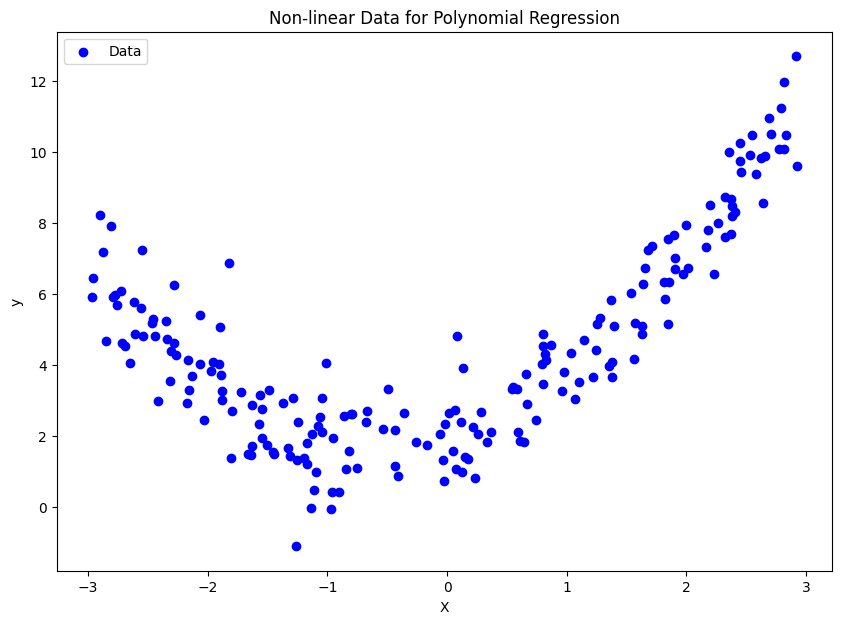

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y, color='blue', label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear Data for Polynomial Regression')
plt.legend()
plt.show()

### Data Spilt

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Transform the Features with Polynomial Terms

In [84]:
degree = 2  # Degree of the polynomial

poly = PolynomialFeatures(degree=degree, include_bias=True)

In [85]:
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [86]:
print(x_train_trans.shape)
print(x_test_trans.shape)

(160, 3)
(40, 3)


## 3. Train the Polynomial Regression Model

In [87]:
poly_model = LinearRegression()

In [88]:
poly_model.fit(x_train_trans, y_train)

LinearRegression()

In [89]:
print("Coefficient:" , poly_model.coef_)
print("Intercept :" , poly_model.intercept_)

Coefficient: [[0.         0.91803513 0.8157192 ]]
Intercept : [2.01784436]


### 4. Make Predictions and Evaluate the Model

In [81]:
y_pred = poly_model.predict(x_test_trans)

In [82]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 1.1036
R-squared (R2): 0.8550


### 5. Visualize the Polynomial Regression Curve

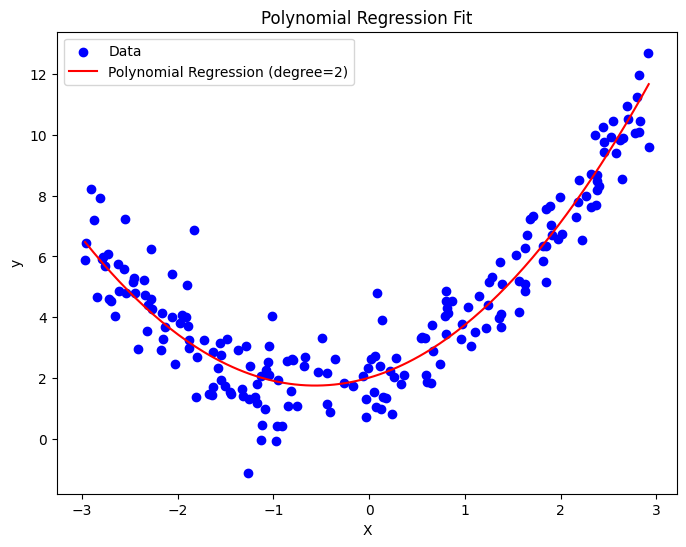

In [90]:
x_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
x_range_trans = poly.transform(x_range)  # Transforming to polynomial features
y_range_pred = poly_model.predict(x_range_trans)  # Predicting values for the curve


plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(x_range, y_range_pred, color='red', label=f'Polynomial Regression (degree={degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')

plt.legend()
plt.show()

### Without Use Polynomial Regression

In [72]:
linear_model = LinearRegression()

In [76]:
linear_model = linear_model.fit(X,y)

In [77]:
print(linear_model.coef_)
print(linear_model.intercept_)

[[1.57732263]]
[14.99149075]


In [78]:
y_pred_linear = linear_model.predict(X)

In [79]:
mse = mean_squared_error(y, y_pred_linear)
r2 = r2_score(y, y_pred_linear)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 211.8645
R-squared (R2): 0.0347


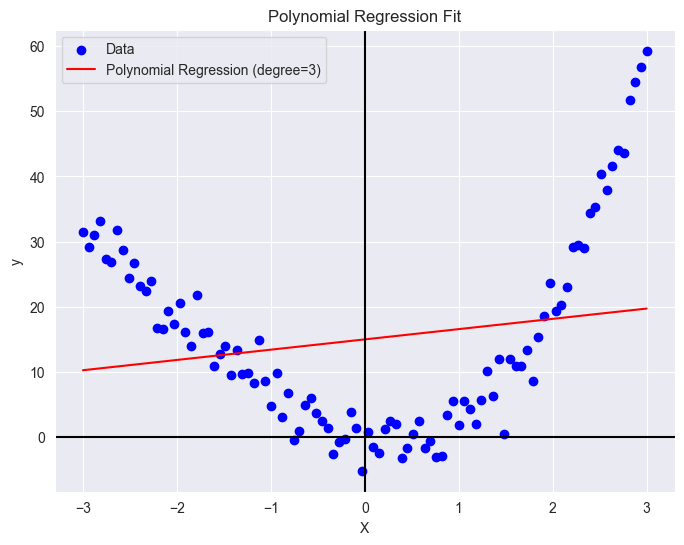

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_linear, color='red', label=f'Polynomial Regression (degree={degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

### Polynomial Regression With Triple Features

In [91]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

In [93]:
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [101]:
# Create a 3D scatter plot using plotly express
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

# Convert x, y, and z to 2D arrays for go.Surface if required for a surface plot
# For example, you could reshape x, y, z to 10x10 if they originally represent 200 points that fit this grid.
x_surface = x.reshape((10, 10))
y_surface = y.reshape((10, 10))
z_surface = z.reshape((10, 10))

# Add a surface plot on the same figure
fig.add_trace(go.Surface(x=x_surface, y=y_surface, z=z_surface))

# Show the plot
fig.show()

In [104]:
X_multi = np.array([x,y]).reshape(100,2)
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [111]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)
X_test_multi = poly.transform(X_multi)
z_final = lr.predict(X_multi_trans).reshape(10,10)